In [3]:
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline 
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 32}



plt.rc('font', **font) 

G0 = nx.read_weighted_edgelist("/home/achiso/MATH27/4932.protein.links.v12.0.txt",comments="#",nodetype=str) #Delete the header first or this might not work!
G0 

#G_1 = nx.read_weighted_edgelist("/home/achiso/MATH27/Sec.txt" , comments="#" , nodetype=str) 
#G_1 

In [4]:
threshold_score = 700
for edge in G0.edges: 
    weight = list(G0.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G0.remove_edge(edge[0],edge[1])

print("( O v O)b") 

( O v O)b


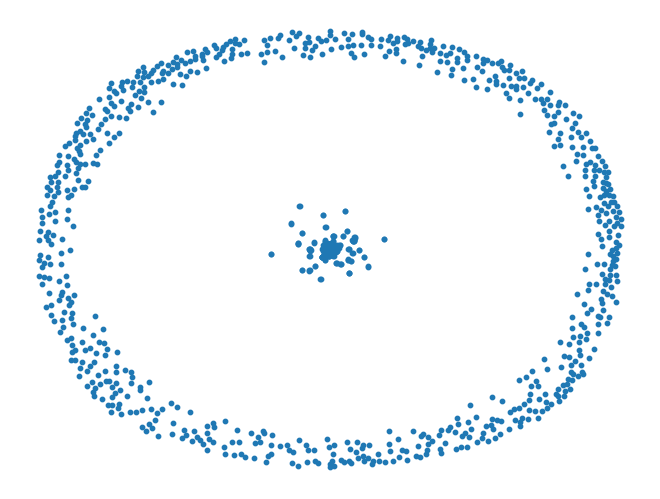

In [5]:
nx.draw(G0,node_size = 10)

In [6]:
new_out = nx.community.label_propagation_communities(G0) 
print(type(new_out))
print(len(new_out))

<class 'dict_values'>
1122


modularity : 0.5372878872013467
|G0| : 6538
|G1| : 4637


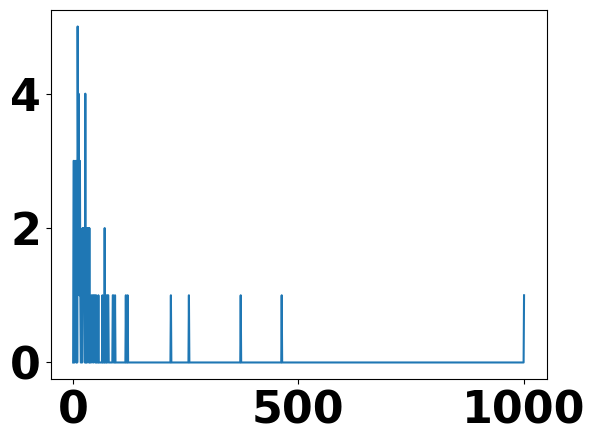

In [10]:

#print(type(new_out))
#di_out = list(new_out) 
#print(len(di_out)) 

modularity_v1 = nx.community.modularity(G0 , new_out) 

print("modularity :" , modularity_v1) 


#nx.community.label_propagation_communities(G0) 
G1 = G0.copy() 
for i in new_out : 
    if len(i) < 11 : 
        for ii in i : 
            G1.remove_node(ii) 
print("|G0| :" , G0.number_of_nodes()) 
print("|G1| :" , G1.number_of_nodes()) 
newer_out = nx.community.label_propagation_communities(G1) 


maxi = 0 
for i in newer_out : 
    if len(i) > maxi : 
        maxi = len(i) 
y = maxi*[0] 

for i in newer_out : 
    y[len(i)-1] += 1 
x = [] 
for i in range(maxi) : 
    x.append(i) 

plt.plot(x , y) 


In [11]:

modularity_v2 = nx.community.modularity(G1 , newer_out) 
print("modularity_v2.0 :" , modularity_v2) 

ccolours_list = ["#00b4d9" , "#4bf542" , "#ff0829" , "#1500ff" , "#f7f302" , "#fa7107" , "#f505cd" , "#9d05f5" , "#fcd305"] 

arr_newer_out = [] 
#for i in newer_out : 
#    temp = [] 
#    for ii in i : 
#        print(ii) 
for i in newer_out : 
    temp = [] 
    for ii in i : 
        temp.append(ii) 
    arr_newer_out.append(temp) 

#colour_map = [] 









modularity_v2.0 : 0.544733466438132


'\nfor i in range(len(arr_newer_out)) : \n    if i in newer_out[ii] : \n        if ii < len(ccolours_list) - 1 : \n            colour_map.append(ccolours_list[ii]) \n        else : \n            colour_map.append("#000000") \n'

In [41]:
tmp_c = 0 
tmp_rcommu = 0 
for i in new_out : 
    for ii in i : 
        if ii == "4932.YMR190C" : 
            print(len(i) , "@" , tmp_rcommu) 
            #print(i) 
            break 
    tmp_rcommu += 1 

tmp_c = 0 
commu_with_SGS1 = None 
for i in new_out : 
    if tmp_c == 33 : 
        commu_with_SGS1 = i 
        break 
    tmp_c += 1 

tmp_c = 0 
for i in commu_with_SGS1 : 
    if i == "4932.YMR190C" : 
        print("4932.YMR190C @" , tmp_c) 
        break 
    tmp_c += 1 



284 @ 33
4932.YMR190C @ 215


In [ ]:
"""
for i in range(len(arr_newer_out)) : 
    if i in newer_out[ii] : 
        if ii < len(ccolours_list) - 1 : 
            colour_map.append(ccolours_list[ii]) 
        else : 
            colour_map.append("#000000") 
""" 



In [ ]:
arr_1 = [] 
for i in new_out : 
    arr_1.append(i) 
    
n_arr = [] 
arr_2 = [] 
for i in arr_1 : 
    if len(i) > 33 : 
        arr_2.append(i) 
#plt.hist(n_arr) 
map_arr = [] 
for i in G0 : 
    if i in arr_2[1] : 
        map_arr.append("red") 
    else : 
        map_arr.append("blue") 
    
largest_cc = max(nx.connected_components(G0) , key=len) 
G0 = G0.subgraph(largest_cc) 

#nx.draw(G0, node_color=map_arr, with_labels=False , node_size=9)

In [ ]:
target_sub = G0.subgraph(arr_2[1]) 
print(len(target_sub)) 
print(len(G0)) 

In [ ]:
print(type([{0, 1, 2}, {3, 4, 5}])) 

In [ ]:
print(type(arr_2)) 
print(type(arr_2[0])) 

print(len(arr_2[0])) 
print(arr_2[0])


In [ ]:
nx.community.modularity(G0 , arr_2) 
